# PROYECTO: Estadísticas de los inscritos en el programa MisiónTIC - Colombia

## Estados de formación -> Aspirante -> Matriculado -> Graduado

# Importar librerías y dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#https://www.datos.gov.co/Ciencia-Tecnolog-a-e-Innovaci-n/Misi-n-TIC-2020-100-mil-programadores/2emd-i46m

misionDB = pd.read_csv('Misi_n_TIC_2020_100_mil_programadores.csv')

## Filtrar información: Año 2020, Ruta 2

In [36]:
misionDB = misionDB[misionDB['RUTA']=='RUTA 2']
misionDB = misionDB[misionDB['FECHA_CORTE']=='2020-12-31']
misionDB

,FECHA_CORTE,departamento,MUNICIPIO_NOMBRE,ESTADO_FORMACION,ESTADOS,CONVOCATORIA,ESTRATO_SOCIAL,EDAD,GENERO,RUTA,GRADO,META_BENEFICIARIO,INVERSION,META_DINERO,FECHA_VIGENCIA
6,2020-12-31,CAUCA,SANTANDER DE QUILICHAO,ASPIRANTE,ASPIRANTES,1,1,34,FEMENINO,RUTA 2,-1,NaN,NaN,NaN,2020-12-31
10,2020-12-31,MAGDALENA,EL BANCO,ASPIRANTE,ASPIRANTES,1,1,34,MASCULINO,RUTA 2,-1,NaN,NaN,NaN,2020-12-31
11,2020-12-31,MAGDALENA,EL BANCO,ASPIRANTE,ASPIRANTES,1,1,34,MASCULINO,RUTA 2,-1,NaN,NaN,NaN,2020-12-31
51,2020-12-31,SANTANDER,MALAGA,ASPIRANTE,ASPIRANTES,1,2,33,FEMENINO,RUTA 2,-1,NaN,NaN,NaN,2020-12-31
52,2020-12-31,BOYACA,DUITAMA,ASPIRANTE,ASPIRANTES,1,2,19,MASCULINO,RUTA 2,-1,NaN,NaN,NaN,2020-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429687,2020-12-31,VALLE DEL CAUCA,CALI,ASPIRANTE,ASPIRANTES,1,2,41,MASCULINO,RUTA 2,-1,NaN,NaN,NaN,2020-12-31
429691,2020-12-31,ANTIOQUIA,CAREPA,ASPIRANTE,ASPIRANTES,1,1,21,MASCULINO,RUTA 2,-1,NaN,NaN,NaN,2020-12-31
429693,2020-12-31,ATLANTICO,MALAMBO,ASPIRANTE,ASPIRANTES,1,2,35,MASCULINO,RUTA 2,-1,NaN,NaN,NaN,2020-12-31
429694,2020-12-31,ATLANTICO,MALAMBO,ASPIRANTE,ASPIRANTES,1,2,35,MASCULINO,RUTA 2,-1,NaN,NaN,NaN,2020-12-31


# Algunos datos estadísticos

## Estrato socioeconómico de los aspirantes 

In [3]:
#misionDB['ESTRATO_SOCIAL'].unique()


In [4]:
#misionDB = misionDB[misionDB['ESTRATO_SOCIAL']!='a']
misionDB = misionDB[(misionDB['ESTRATO_SOCIAL']!='a')&(misionDB['EDAD']!=120)&(misionDB['EDAD']!=108)]
misionDB['ESTRATO_SOCIAL'] = misionDB['ESTRATO_SOCIAL'].astype(int)
estratos = misionDB['ESTRATO_SOCIAL'].unique()

estratos.sort()


In [5]:
plt.style.use('seaborn-white')
serieEstratoAspirantes = misionDB['ESTRATO_SOCIAL']
serieEstratoMatriculados = misionDB[misionDB['ESTADO_FORMACION']=='MATRICULADO']['ESTRATO_SOCIAL']
serieEstratoGraduados = misionDB[misionDB['ESTADO_FORMACION']=='GRADUADO']['ESTRATO_SOCIAL']

In [37]:
relacionMatriculadoAspiranteArray = []

for estrato in estratos:
    poblacionAspirante = len(misionDB[(misionDB['ESTADO_FORMACION']=='ASPIRANTE') & (misionDB['ESTRATO_SOCIAL']==estrato)]['ESTRATO_SOCIAL'])
    poblacionMatriculado = len(misionDB[(misionDB['ESTADO_FORMACION']=='MATRICULADO') & (misionDB['ESTRATO_SOCIAL']==estrato)]['ESTRATO_SOCIAL'])
    relacionMatriculadoAspirante = (poblacionMatriculado/poblacionAspirante)*100
    relacionMatriculadoAspiranteArray.append(relacionMatriculadoAspirante)
    print(f'Estrato {estrato} - Núm. Aspirantes: {poblacionAspirante}, Núm. Matriculados: {poblacionMatriculado}, Relación: {relacionMatriculadoAspirante:,.2f}%')


Estrato 1 - Núm. Aspirantes: 23377, Núm. Matriculados: 426, Relación: 1.82%
Estrato 2 - Núm. Aspirantes: 42991, Núm. Matriculados: 1281, Relación: 2.98%
Estrato 3 - Núm. Aspirantes: 37964, Núm. Matriculados: 1736, Relación: 4.57%
Estrato 4 - Núm. Aspirantes: 8203, Núm. Matriculados: 570, Relación: 6.95%
Estrato 5 - Núm. Aspirantes: 1735, Núm. Matriculados: 127, Relación: 7.32%
Estrato 6 - Núm. Aspirantes: 482, Núm. Matriculados: 41, Relación: 8.51%


In [38]:
relacionGraduadoAspiranteArray = []

for estrato in estratos:
    poblacionAspirante = len(misionDB[(misionDB['ESTADO_FORMACION']=='ASPIRANTE') & (misionDB['ESTRATO_SOCIAL']==estrato)]['ESTRATO_SOCIAL'])
    poblacionGraduado = len(misionDB[(misionDB['ESTADO_FORMACION']=='GRADUADO') & (misionDB['ESTRATO_SOCIAL']==estrato)]['ESTRATO_SOCIAL'])
    relacionGraduadoAspirante = (poblacionGraduado/poblacionAspirante)*100
    relacionGraduadoAspiranteArray.append(relacionGraduadoAspirante)
    print(f'Estrato {estrato} - Núm. Aspirantes: {poblacionAspirante}, Núm. Graduados: {poblacionGraduado}, Relación: {relacionGraduadoAspirante:,.2f}%')


Estrato 1 - Núm. Aspirantes: 23377, Núm. Graduados: 160, Relación: 0.68%
Estrato 2 - Núm. Aspirantes: 42991, Núm. Graduados: 534, Relación: 1.24%
Estrato 3 - Núm. Aspirantes: 37964, Núm. Graduados: 685, Relación: 1.80%
Estrato 4 - Núm. Aspirantes: 8203, Núm. Graduados: 264, Relación: 3.22%
Estrato 5 - Núm. Aspirantes: 1735, Núm. Graduados: 56, Relación: 3.23%
Estrato 6 - Núm. Aspirantes: 482, Núm. Graduados: 21, Relación: 4.36%


In [39]:
relacionGraduadoMatriculadoArray = []

for estrato in estratos:
    poblacionMatriculado = len(misionDB[(misionDB['ESTADO_FORMACION']=='MATRICULADO') & (misionDB['ESTRATO_SOCIAL']==estrato)]['ESTRATO_SOCIAL'])
    poblacionGraduado = len(misionDB[(misionDB['ESTADO_FORMACION']=='GRADUADO') & (misionDB['ESTRATO_SOCIAL']==estrato)]['ESTRATO_SOCIAL'])
    
    relacionGraduadoMatriculado = (poblacionGraduado/poblacionMatriculado)*100
    relacionGraduadoMatriculadoArray.append(relacionGraduadoMatriculado)
    print(f'Estrato {estrato} - Núm. Matriculado: {poblacionMatriculado}, Núm. Graduados: {poblacionGraduado}, Relación: {relacionGraduadoMatriculado:,.2f}%')


Estrato 1 - Núm. Matriculado: 426, Núm. Graduados: 160, Relación: 37.56%
Estrato 2 - Núm. Matriculado: 1281, Núm. Graduados: 534, Relación: 41.69%
Estrato 3 - Núm. Matriculado: 1736, Núm. Graduados: 685, Relación: 39.46%
Estrato 4 - Núm. Matriculado: 570, Núm. Graduados: 264, Relación: 46.32%
Estrato 5 - Núm. Matriculado: 127, Núm. Graduados: 56, Relación: 44.09%
Estrato 6 - Núm. Matriculado: 41, Núm. Graduados: 21, Relación: 51.22%


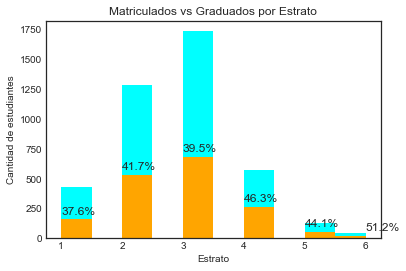

In [9]:
plt.hist(serieEstratoMatriculados, histtype='stepfilled', color="cyan", label="Matriculados")
#plt.hist(serieEstratoGraduados, histtype='stepfilled',color="cyan", label="Graduados")

plt.xlabel("Estrato")
plt.ylabel("Cantidad de estudiantes")
plt.title("Matriculados vs Graduados por Estrato")

plt.rcParams["figure.figsize"] = (11, 6)
v,m,g = plt.hist(serieEstratoGraduados, histtype='stepfilled', color="orange", label="Graduados")
etiqueta = [etiqueta for etiqueta in v if etiqueta !=0]

for x,y,valor in zip(estratos, etiqueta, relacionGraduadoMatriculadoArray):   
    plt.text(x,y+40,'%.1f'%valor+'%',fontsize=12,ha="left")   

plt.show() 
    
    

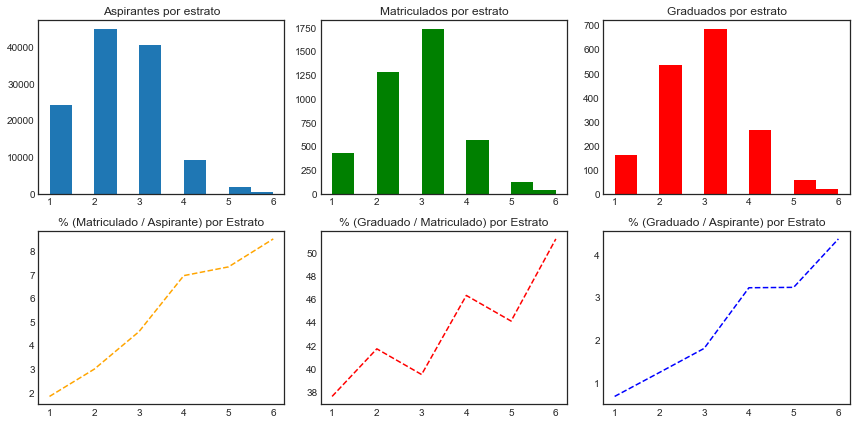

In [10]:
plt.rcParams["figure.figsize"] = (12, 6)
fig, ax = plt.subplots(2,3)
ax[0][0].hist(serieEstratoAspirantes, histtype='stepfilled')
ax[0][1].hist(serieEstratoMatriculados, histtype='stepfilled',color="green")
ax[0][2].hist(serieEstratoGraduados, histtype='stepfilled',color="red")
ax[1][0].plot(estratos, relacionMatriculadoAspiranteArray, '--',color="orange")
ax[1][1].plot(estratos, relacionGraduadoMatriculadoArray, '--',color="red")
ax[1][2].plot(estratos, relacionGraduadoAspiranteArray, '--',color="blue")

ax[0][0].set_title('Aspirantes por estrato')
ax[0][1].set_title('Matriculados por estrato')
ax[0][2].set_title('Graduados por estrato')
ax[1][0].set_title('% (Matriculado / Aspirante) por Estrato')
ax[1][1].set_title('% (Graduado / Matriculado) por Estrato')
ax[1][2].set_title('% (Graduado / Aspirante) por Estrato')
plt.tight_layout()

## Género aspirantes

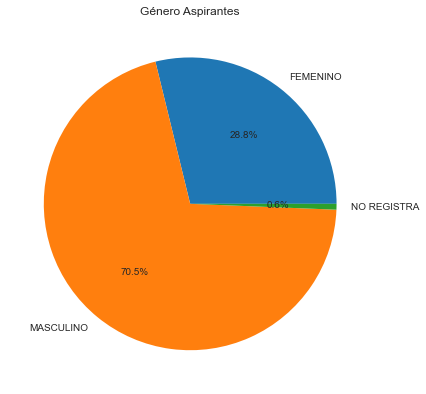

In [11]:
plt.rcParams["figure.figsize"] = (6, 6)
generoAspirantes = misionDB[misionDB['ESTADO_FORMACION']=='ASPIRANTE'].groupby('GENERO').count()['EDAD']

fig, ax = plt.subplots()
ax.pie(generoAspirantes, labels=generoAspirantes.index, autopct='%.1f%%')
ax.set_title('Género Aspirantes')

plt.tight_layout()
plt.show()

## Relación graduados y género

In [12]:
serieGeneroGraduados = misionDB[misionDB['ESTADO_FORMACION']=='GRADUADO']['GENERO']
serieGeneroMatriculados = misionDB[misionDB['ESTADO_FORMACION']=='MATRICULADO']['GENERO']
serieGeneroAspirantes = misionDB[misionDB['ESTADO_FORMACION']=='ASPIRANTE']['GENERO']

generos = misionDB['GENERO'].unique()

generos =['MASCULINO','FEMENINO','NO REGISTRA']


## Relación graduado-matriculado

In [13]:
relacionGraduadoMatriculadoGenero = []

for genero in generos:
    
    poblacionMatriculado = len(misionDB[(misionDB['ESTADO_FORMACION']=='MATRICULADO') & (misionDB['GENERO']==genero)]['GENERO'])
    poblacionGraduado = len(misionDB[(misionDB['ESTADO_FORMACION']=='GRADUADO') & (misionDB['GENERO']==genero)]['GENERO'])
    
    relacionGraduadoMatriculado = (poblacionGraduado/poblacionMatriculado)*100
    relacionGraduadoMatriculadoGenero.append(relacionGraduadoMatriculado)
    print(f'Género {genero} - Núm. Matriculado: {poblacionMatriculado}, Núm. Graduados: {poblacionGraduado}, Relación: {relacionGraduadoMatriculado:,.2f}%')

    
#relacionGraduadoMatriculadoGenero

Género MASCULINO - Núm. Matriculado: 3266, Núm. Graduados: 1350, Relación: 41.33%
Género FEMENINO - Núm. Matriculado: 898, Núm. Graduados: 366, Relación: 40.76%
Género NO REGISTRA - Núm. Matriculado: 17, Núm. Graduados: 4, Relación: 23.53%


## Gráfica

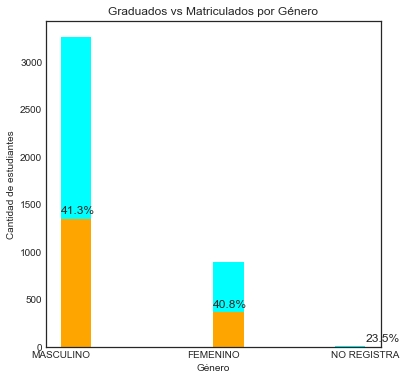

In [14]:
plt.hist(serieGeneroMatriculados, histtype='stepfilled', color="cyan", label="Matriculados")
plt.xlabel("Género")
plt.ylabel("Cantidad de estudiantes")
plt.title("Graduados vs Matriculados por Género")

plt.rcParams["figure.figsize"] = (13, 6)
v,m,g = plt.hist(serieGeneroGraduados, histtype='stepfilled', color="orange", label="Graduados")
etiqueta = [etiqueta for etiqueta in v if etiqueta !=0]

for x,y,valor in zip(generos, etiqueta, relacionGraduadoMatriculadoGenero):   
    plt.text(x,y+50,'%.1f'%valor+'%',fontsize=12,ha="left")
    #print(x,y,valor)
plt.show() 


In [15]:
'''
plt.rcParams["figure.figsize"] = (8, 8)

plt.hist(misionDB[misionDB['ESTADO_FORMACION']=='ASPIRANTE']['EDAD'], histtype='stepfilled',color='orange')
plt.show()
'''

'\nplt.rcParams["figure.figsize"] = (8, 8)\n\nplt.hist(misionDB[misionDB[\'ESTADO_FORMACION\']==\'ASPIRANTE\'][\'EDAD\'], histtype=\'stepfilled\',color=\'orange\')\nplt.show()\n'

## Departamento aspirantes

<BarContainer object of 34 artists>

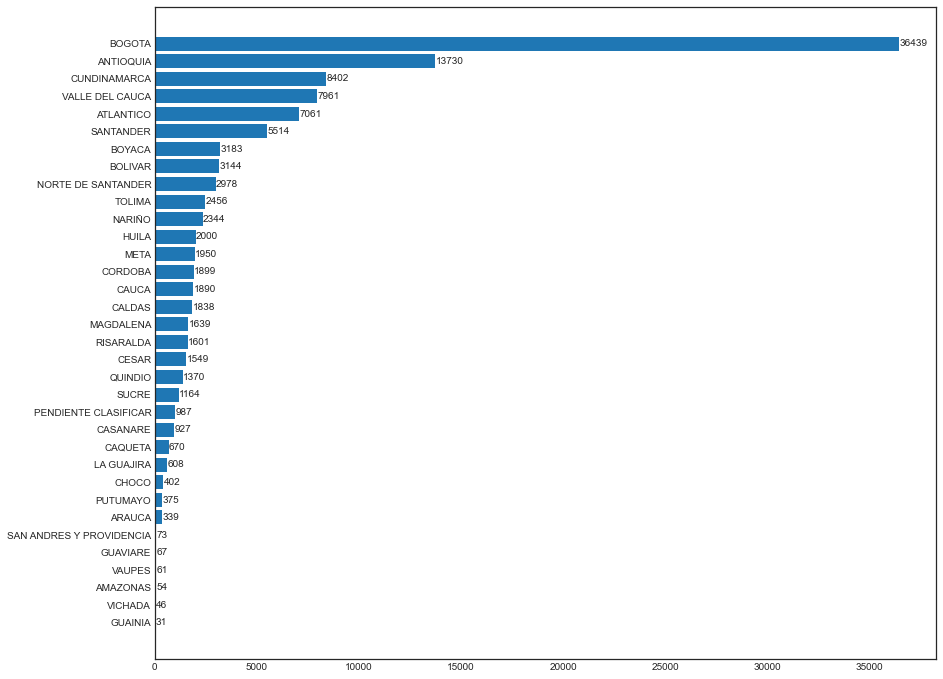

In [16]:
departamentoAspirantes = misionDB[misionDB['ESTADO_FORMACION']=='ASPIRANTE'].groupby('DEPARTAME_NOMBRE').count()['EDAD'].sort_values()
plt.rcParams["figure.figsize"] = (14, 12)

for x,y in enumerate(departamentoAspirantes):
    plt.text(y+20,x,'%s' %y,va='center')
    
plt.barh(departamentoAspirantes.index, departamentoAspirantes)

#https://www.geeksforgeeks.org/matplotlib-pyplot-barh-function-in-python/

In [17]:
#misionDB.describe()

# Análisis inscritos MinTIC vs cobertura educativa por departamento

## Crear un dataframe de Mision TIC agrupado por departamentos

In [18]:
misionDB.rename(columns={'DEPARTAME_NOMBRE':'departamento'},
               inplace=True)

aspirantesDepartamento = []
matriculadosDepartamento = []
graduadosDepartamento = []
departamentos = []

for grupo, frame in misionDB.groupby('departamento'):
    cantidadAspirantes = len(frame[frame['ESTADO_FORMACION']=='ASPIRANTE']['ESTADO_FORMACION'])
    cantidadMatriculados = len(frame[frame['ESTADO_FORMACION']=='MATRICULADO']['ESTADO_FORMACION'])
    cantidadGraduados = len(frame[frame['ESTADO_FORMACION']=='GRADUADO']['ESTADO_FORMACION'])
    
    aspirantesDepartamento.append(cantidadAspirantes)
    matriculadosDepartamento.append(cantidadMatriculados)
    graduadosDepartamento.append(cantidadGraduados)
    departamentos.append(grupo)
    
    porcentajeGraduados = (cantidadGraduados/cantidadMatriculados)*100 if cantidadMatriculados != 0 else 0
    #print(f'{grupo}: {cantidadAspirantes} aspirantes, {cantidadMatriculados} matriculados, {cantidadGraduados} graduados. Relación: {porcentajeGraduados:,.2f}%')

departamentosDataframe = pd.DataFrame()

departamentosDataframe['aspirantes'] = aspirantesDepartamento
departamentosDataframe['matriculados'] = matriculadosDepartamento
departamentosDataframe['graduados'] = graduadosDepartamento
departamentosDataframe['departamento'] = departamentos

departamentosDataframe.set_index('departamento', inplace=True)

In [40]:
departamentosDataframe

,aspirantes,matriculados,graduados
departamento,,,
AMAZONAS,54,1,0
ANTIOQUIA,13730,610,234
ARAUCA,339,5,2
ATLANTICO,7061,196,85
BOGOTA,36439,1565,648
BOLIVAR,3144,99,50
BOYACA,3183,112,35
CALDAS,1838,63,22
CAQUETA,670,12,8


## Importar datos (json) de cobertura educativa por departamento

In [20]:
import requests
educacion_json = 'https://www.datos.gov.co/resource/ji8i-4anb.json'

educacionDB = pd.read_json(educacion_json)

educacionDB=educacionDB[educacionDB['ano']==2020]

educacionDB = educacionDB[['ano','departamento','cobertura_bruta','cobertura_neta','desercion']]

#print(educacionDB['departamento'].unique())
#print(departamentosDataframe.index.unique().sort_values())


## Cambiar valores para hacer merge

In [21]:

educacionDB['departamento']= educacionDB['departamento'].replace(
    ['Antioquia' , 'Atlántico' , 'Bogotá D.C.' , 'Bolívar' , 'Boyacá' , 'Caldas',
     'Caquetá' , 'Cauca' , 'Cesar' , 'Córdoba' , 'Cundinamarca' , 'Chocó' , 'Huila',
     'La Guajira' , 'Magdalena' , 'Meta' , 'Nariño' , 'Norte de Santander' , 'Quindio',
     'Risaralda' , 'Santander' , 'Sucre' , 'Tolima' , 'Valle del Cauca' , 'Arauca',
     'Casanare' , 'Putumayo',
     'Archipiélago de San Andrés. Providencia y Santa Catalina' , 'Amazonas',
     'Guainía' , 'Guaviare' , 'Vaupés' , 'Vichada']

    ,['ANTIOQUIA','ATLANTICO','BOGOTA','BOLIVAR','BOYACA','CALDAS',
      'CAQUETA','CAUCA','CESAR','CORDOBA','CUNDINAMARCA','CHOCO',
      'HUILA','LA GUAJIRA','MAGDALENA','META','NARIÑO','NORTE DE SANTANDER','QUINDIO',
      'RISARALDA','SANTANDER','SUCRE','TOLIMA','VALLE DEL CAUCA','ARAUCA',
      'CASANARE','PUTUMAYO','SAN ANDRES Y PROVIDENCIA','AMAZONAS',
      'GUAINIA','GUAVIARE','VAUPES','VICHADA']
)

educacionDB.set_index('departamento',inplace = True)

In [41]:
educacionDB

,ano,cobertura_bruta,cobertura_neta,desercion
departamento,,,,
ANTIOQUIA,2020,106.19,93.43,2.30
ATLANTICO,2020,100.38,92.38,1.41
BOGOTA,2020,104.74,95.89,0.46
BOLIVAR,2020,110.40,98.80,2.03
BOYACA,2020,103.67,94.84,1.70
CALDAS,2020,96.32,84.57,2.35
CAQUETA,2020,101.54,88.91,6.28
CAUCA,2020,95.43,84.97,1.59
CESAR,2020,99.16,89.73,8.58


## Hacer merge

In [23]:
departamentosMerge = pd.merge(departamentosDataframe, educacionDB, how='outer', left_index=True, right_index=True)

In [42]:
departamentosMerge

,aspirantes,matriculados,graduados,ano,cobertura_bruta,cobertura_neta,desercion,rel_matriculados_aspirantes,rel_graduados_matriculados,rel_graduados_aspirantes
departamento,,,,,,,,,,
AMAZONAS,54,1,0,2020.0,94.99,81.24,2.37,1.851852,0.000000,0.000000
ANTIOQUIA,13730,610,234,2020.0,106.19,93.43,2.30,4.442826,38.360656,1.704297
ARAUCA,339,5,2,2020.0,105.96,92.81,3.93,1.474926,40.000000,0.589971
ATLANTICO,7061,196,85,2020.0,100.38,92.38,1.41,2.775811,43.367347,1.203795
BOGOTA,36439,1565,648,2020.0,104.74,95.89,0.46,4.294849,41.405751,1.778314
BOLIVAR,3144,99,50,2020.0,110.40,98.80,2.03,3.148855,50.505051,1.590331
BOYACA,3183,112,35,2020.0,103.67,94.84,1.70,3.518693,31.250000,1.099592
CALDAS,1838,63,22,2020.0,96.32,84.57,2.35,3.427639,34.920635,1.196953
CAQUETA,670,12,8,2020.0,101.54,88.91,6.28,1.791045,66.666667,1.194030


## Crear columna con relaciones entre aspirantes, matriculados y graduados

In [25]:
import seaborn as sns

plt.rcParams["figure.figsize"] = (5, 4)

departamentosMerge['rel_matriculados_aspirantes'] = (departamentosMerge['matriculados']/departamentosMerge['aspirantes'])*100
departamentosMerge['rel_graduados_matriculados'] = (departamentosMerge['graduados']/departamentosMerge['matriculados'])*100
departamentosMerge['rel_graduados_aspirantes'] = (departamentosMerge['graduados']/departamentosMerge['aspirantes'])*100

In [26]:
#departamentosMerge.sort_values('rel_matriculados_aspirantes')

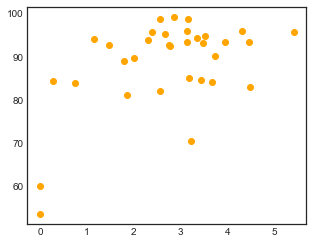

In [27]:
plt.plot(departamentosMerge['rel_matriculados_aspirantes'], departamentosMerge['cobertura_neta'], 'o',color="orange")
plt.show()

## Correlación

In [28]:
import seaborn as sns

plt.rcParams["figure.figsize"] = (5, 4)


### Matriculados / Aspirantes vs cobertura neta

,rel_matriculados_aspirantes,cobertura_neta
rel_matriculados_aspirantes,1.000000,0.514035
cobertura_neta,0.514035,1.000000


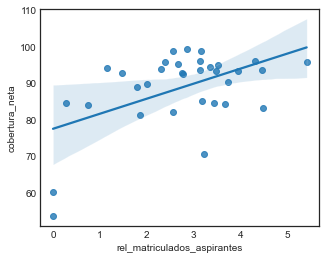

In [29]:
sns.regplot(x='rel_matriculados_aspirantes',y='cobertura_neta', data = departamentosMerge,marker="o")
sns.set_theme(color_codes=True)

departamentosMerge[['rel_matriculados_aspirantes','cobertura_neta']].corr()
#0.5: asociación moderada.

### Graduados / Matriculados vs cobertura neta

,rel_graduados_matriculados,cobertura_neta
rel_graduados_matriculados,1.000000,0.379852
cobertura_neta,0.379852,1.000000


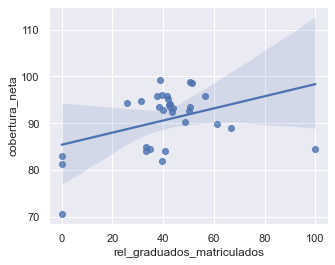

In [30]:
sns.regplot(x='rel_graduados_matriculados',y='cobertura_neta', data = departamentosMerge,marker="o")
sns.set_theme(color_codes=True)

departamentosMerge[['rel_graduados_matriculados','cobertura_neta']].corr()

### Graduados / Aspirantes vs cobertura neta

,rel_graduados_aspirantes,cobertura_neta
rel_graduados_aspirantes,1.000000,0.678685
cobertura_neta,0.678685,1.000000


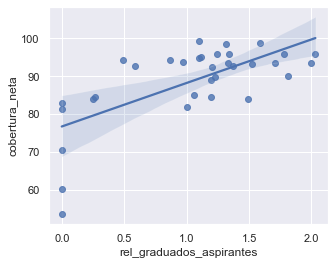

In [31]:
sns.regplot(x='rel_graduados_aspirantes',y='cobertura_neta', data = departamentosMerge,marker="o")
sns.set_theme(color_codes=True)
departamentosMerge[['rel_graduados_aspirantes','cobertura_neta']].corr()